In [87]:
%matplotlib inline

In [88]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as Plot
from sklearn.preprocessing import scale

In [89]:
def load_data(feat_file,label_file):
    feats = np.load(feat_file)
    labels = open(label_file,"r").read().strip().split(",")
    print type(feats)
    print feats.shape
    print "labels", len(labels)
    return feats, labels

In [103]:
feat_file = "../data/102flowers/fc_conv4_res152.pca1000.npy"
label_file = "../data/102flowers/imagelabels.txt"
feats, labels = load_data(feat_file,label_file)
#feats, labels = feats[:591,:], labels[:591]
#feats, labels = feats[:1695], labels[:1695]
print len(labels)
print feats.shape

<type 'numpy.ndarray'>
(8189, 1000)
labels 8189
8189
(8189, 1000)


In [100]:
from collections import defaultdict
def show(feats,labels):
    color_dict= defaultdict(lambda: len(color_dict))
    for label in labels:
        index = color_dict[int(label)]
    print color_dict        
    color_list = ["y","k","m","c","#ca7f68","#0e2f44","#9791ab","g","b","r"]
    x, y = feats[:,0], feats[:,1]
    print len(labels), "label num"
    for i in range(len(labels)):
        color_index = color_dict[int(labels[i])]
        #print i,x[i],y[i], color_list[color_index]
        Plot.scatter(x[i],y[i],color=color_list[color_index],s=3)
    #Plot.legend(numpoints=1,loc=3);
    Plot.savefig("../figures/reset-OX-conv4-10.png",psi=500)
    Plot.show()

In [99]:
# t-SNE
model = TSNE(n_components=2, random_state=1)
feats_x = model.fit_transform(scale(feats))
#sorted_x =sorted(feats_x, key=lambda d:d[0], reverse = False)
print feats.shape
#show(feats, labels[:400])
#Plot.scatter(feats[:,0],feats[:,1],)


(1695, 1000)


defaultdict(<function <lambda> at 0x1180fc9b0>, {73: 1, 74: 6, 44: 8, 77: 0, 46: 5, 81: 4, 82: 9, 51: 7, 88: 2, 89: 3})
1695 label num


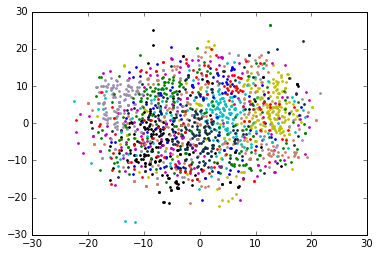

None


In [101]:
print show(feats_x,labels)

In [104]:
from sklearn.cross_validation import train_test_split, KFold
from sklearn import svm
n = feats.shape[0]
scores = []
kf = KFold(n, n_folds=5,shuffle=True)
for train, test in kf:
    X_train, X_test, y_train, y_test = feats[train], feats[test], np.array(labels)[train], np.array(labels)[test]
    print X_train.shape, y_train.shape
    clf = svm.SVC(kernel='linear',C=1).fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print "score is ", score
    scores.append(score)

print np.mean(np.array(scores))

(6551, 1000) (6551,)
score is  0.685592185592
(6551, 1000) (6551,)
score is  0.681929181929
(6551, 1000) (6551,)
score is  0.705128205128
(6551, 1000) (6551,)
score is  0.70695970696
(6552, 1000) (6552,)
score is  0.703115455101
0.696544946942
